This is where we plot our experimental results.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Insert the path to the metrics data
control_var = 4
path_to_data = f"pfl/experimental_results/mnist_dp/mnist-dp-eps_{control_var}-lr_0_01"

In [26]:
# List of pandas DataFrames to hold the metrics
metrics_dfs = []

for i in range(1, 4):
    # metrics = pd.read_csv("pfl/experimental_results/mnist_dp/mnist-dp-eps_7.csv")
    metrics = pd.read_csv(f'{path_to_data} ({i}).csv')
    metrics = metrics.dropna(subset=['Central val | accuracy']) # A DataFrame
    metrics_dfs.append(metrics['Central val | accuracy'])       # Append DataFrame to the list

accuracy_df = pd.concat(metrics_dfs, axis=1)

In [27]:
mean_accuracy = accuracy_df.mean(axis=1)
epochs = range(len(mean_accuracy))

Text(0.5, 1.0, 'MNIST - eps = 4, lr = 0.01')

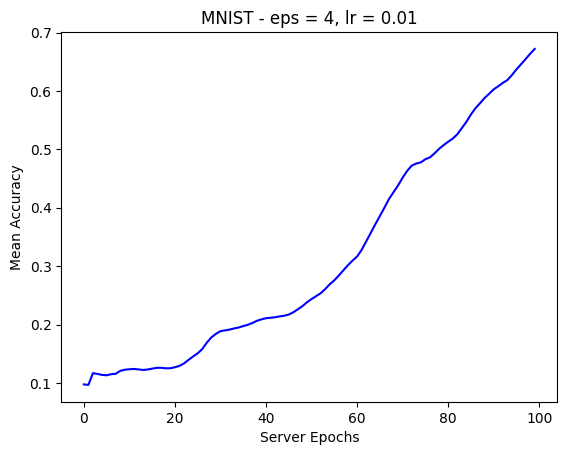

In [28]:
plt.plot(epochs, mean_accuracy, label='Mean Centralized Validation Accuracy', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.title(f'MNIST - eps = {control_var}, lr = 0.01')

In [ ]:
def extract_average(metric, path, count):
    metrics_dfs = []
    for i in range(1, count + 1):
        metrics = pd.read_csv(f'{path} ({i}).csv')
        metrics = metrics.dropna(subset=[metric])
        metrics_dfs.append(metrics[metric])
    return pd.concat(metrics_dfs, axis=1).mean(axis=1)  

In [ ]:
path = "pfl/experimental_results/mnist_no_dp/mnist-no_dp-local_epoch_"

mnist_local_epoch_1 = extract_average('Central val | accuracy', path + '1', 3)
mnist_local_epoch_2 = extract_average('Central val | accuracy', path + '2', 3)
mnist_local_epoch_4 = extract_average('Central val | accuracy', path + '4', 1)
mnist_local_epoch_6 = extract_average('Central val | accuracy', path + '6', 1)
mnist_local_epoch_8 = extract_average('Central val | accuracy', path + '8', 1)

In [54]:
metrics_dfs[4]

0     0.1000
1     0.1000
2     0.1000
3     0.1015
4     0.1002
5     0.1000
6     0.1002
7     0.1000
8     0.1000
9     0.1062
10    0.1043
11    0.1000
12    0.0992
13    0.1000
14    0.1000
15    0.1000
16    0.1000
17    0.1158
18    0.1000
19    0.0989
20    0.1000
21    0.1000
22    0.1149
23    0.0910
24    0.1059
25    0.1000
26    0.1000
27    0.0999
28    0.1002
29    0.1000
30    0.1000
31    0.1004
32    0.1000
33    0.1000
34    0.1000
35    0.1000
36    0.1000
37    0.1000
38    0.1000
39    0.1000
40    0.1006
41    0.1000
42    0.1037
43    0.1000
44    0.1000
45    0.1000
46    0.1164
47    0.1000
48    0.1000
49    0.1177
Name: Central val | accuracy, dtype: float64

# Debugging code

Text(0.5, 1.0, 'Mean Centralized Validation Accuracy Over Server Epochs')

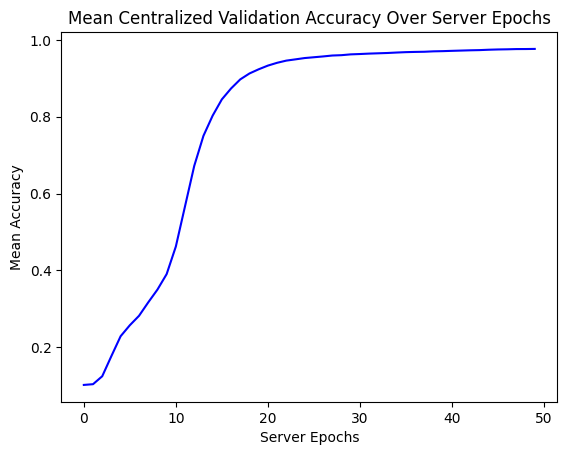

In [8]:
path_to_debug_data = "pfl/experimental_results/mnist_no_dp/mnist-optim_adam.csv"
metrics = pd.read_csv(path_to_debug_data)

accuracy = metrics['Central val | accuracy'].dropna()
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='Mean Centralized Validation Accuracy', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Mean Centralized Validation Accuracy Over Server Epochs')